In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


In [17]:
winepy = pd.read_table('wine.txt', sep=" ")
winepy
winequant=winepy
winequant=winequant.drop(columns=['Type','Qualite'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
scaler.fit(winequant);
winequant=scaler.transform(winequant)
from sklearn.decomposition import PCA
mypca = PCA(n_components=3);
mypca.fit(winequant);
dataPCA=mypca.fit_transform(winequant)

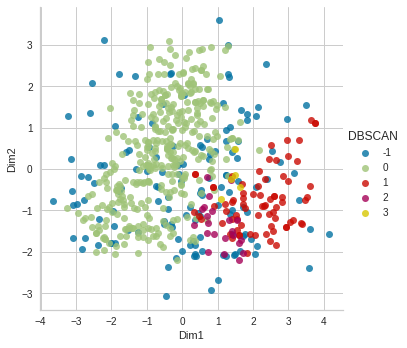

In [22]:
##DBSCAN
from sklearn.cluster import DBSCAN
eps=1
minPts = 7
dbsc = DBSCAN(eps = eps,min_samples = minPts).fit(winequant)
pd.crosstab(dbsc.labels_,"freq")

import seaborn as sns
import pandas as pd
pca_df = pd.DataFrame({
    "Dim1" : dataPCA[:,0], 
    "Dim2" : dataPCA[:,1],
    "DBSCAN" : dbsc.labels_
})
sns.lmplot( x="Dim1", y="Dim2", data=pca_df, fit_reg=False, hue='DBSCAN', legend=True);
plt.show()

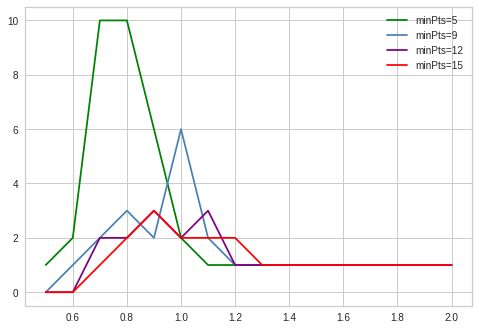

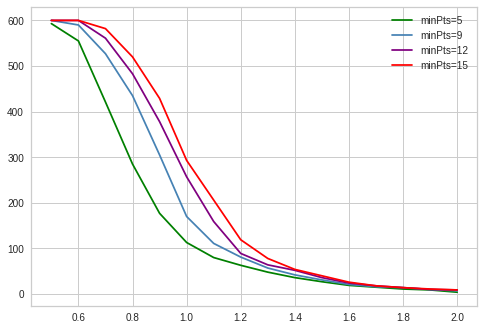

In [24]:
epsvalue= np.arange(0.5,2.1,0.1)
minPtsvalue= np.arange(5,16,1)
NBCluster = np.zeros((minPtsvalue.size,epsvalue.size))
NBNonCl=np.zeros((minPtsvalue.size,epsvalue.size))

for i in np.arange(0,minPtsvalue.size,1):
    for j in np.arange(0,epsvalue.size,1):
        resdbsc = DBSCAN(eps=epsvalue[j],min_samples=minPtsvalue[i]).fit(winequant)
        NBCluster[i,j] = max(resdbsc.labels_) + 1
        NBNonCl[i,j] = (resdbsc.labels_==-1).sum()
    
# 
plt.plot(epsvalue,NBCluster[0,:], label='minPts=5', color='green')
plt.plot(epsvalue,NBCluster[4,:], label='minPts=9', color='steelblue')
plt.plot(epsvalue,NBCluster[7,:], label='minPts=12', color='purple')
plt.plot(epsvalue,NBCluster[10,:], label='minPts=15', color='red')
plt.legend()
plt.show()
plt.close()

#    
plt.plot(epsvalue,NBNonCl[0,:], label='minPts=5', color='green')
plt.plot(epsvalue,NBNonCl[4,:], label='minPts=9', color='steelblue')
plt.plot(epsvalue,NBNonCl[7,:], label='minPts=12', color='purple')
plt.plot(epsvalue,NBNonCl[10,:], label='minPts=15', color='red')
plt.legend()
plt.show()

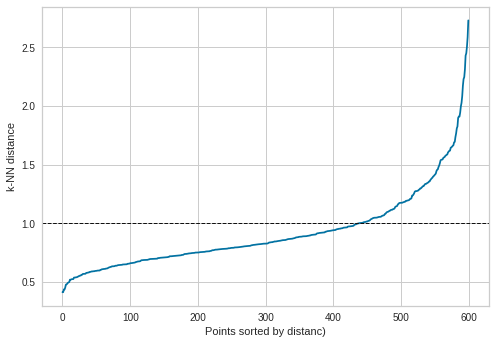

col_0,freq
row_0,
-1,138
0,360
1,75
2,22
3,5


In [25]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors = 7)
neighbors_fit = neighbors.fit(winequant)
distances, indices = neighbors_fit.kneighbors(winequant)
distancesmean = np.sort(distances.sum(axis=1)/6,axis=0)

plt.plot(distancesmean)
plt.axhline(y=1, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Points sorted by distanc)")
plt.show()

dbscopt = DBSCAN(eps=eps, min_samples=7).fit(winequant)
pd.crosstab(dbscopt.labels_,"freq")

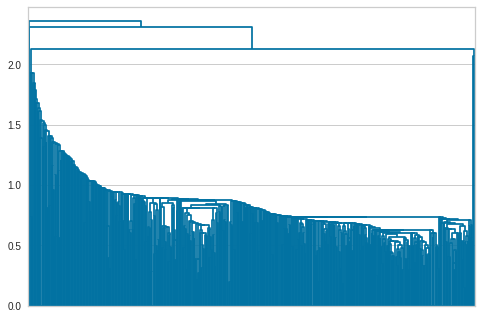

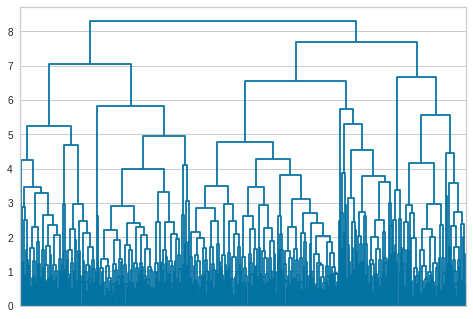

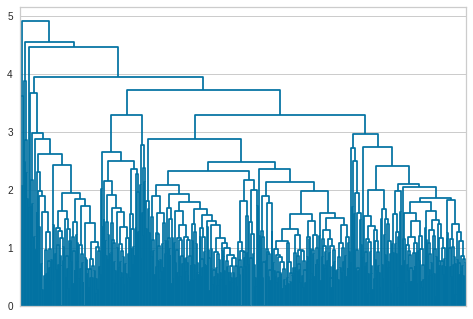

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
hsingle=linkage(winequant,method='single')
hcomplete=linkage(winequant,method='complete')
haverage=linkage(winequant,method = 'average')

dendrogram(hsingle,no_labels=True,color_threshold=0);
plt.show()
dendrogram(hcomplete,no_labels=True,color_threshold=0);
plt.show()
dendrogram(haverage,no_labels=True,color_threshold=0);
plt.show()